<a href="https://colab.research.google.com/github/al-lla/RNA_MLP_YieldCurveForecast/blob/main/FIAP_RNA_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = 'https://www.sejabixo.com.br/wp-content/uploads/2021/11/vestibular-fiap-2022-1.jpg' width = '300'>

# Rede Neural Artificial: Classificação

# Reconhecimento de Imagens

As Redes Neurais possuem grande aplicação em problemas de _classificação de imagem_, isto é, a partir do treinamento de uma rede com um conjunto de imagens, é possível obter um modelo que receba imagens como input e classifique o conteúdo da imagem.

# Bibliotecas

In [1]:
# Manipulação de dados
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Modelagem
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Base de dados

Para entender o funcionamento de uma Rede Neural para classificação de imagens, utilizaremos uma base clássifca presente no pacote TensorFlow.

Utilizaremos a base de dados [mnist](https://www.tensorflow.org/datasets/catalog/mnist) de autoria de Yann LeCun, Corinna Cortes e CJ Burges.

A base conta com 70.000 observações de números de 0 a 9 manuescritos e um label indicando o número escrito.

In [2]:
# Baixar base de dados e alocar em vetores 
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


O número de observações da base de treino é 60000.


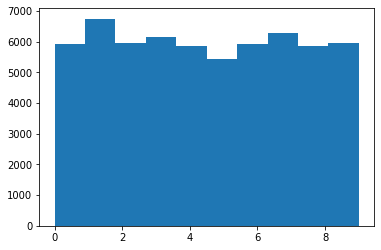

In [17]:
# Observações
print(f'O número de observações da base de treino é {len(y_train)}.')

# Histograma
plt.hist(y_train);

O número de observações da base de teste é 10000.


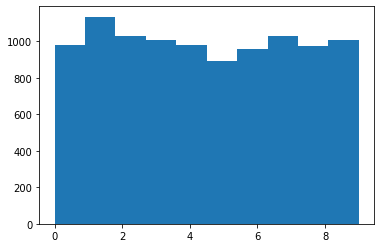

In [18]:
# Observações
print(f'O número de observações da base de teste é {len(y_test)}.')

# Histograma
plt.hist(y_test);

## Transformando uma imagem em base de dados

Uma imagem é formada por pixels, um pequeno quadrado que é pintado com uma cor e, ao juntar diferentes pixels, em sequência, a imagem é formada.

Caso a quantidade de pixels seja pequena, é possível ver os diferentes quadrados que formam uma imagem, mas, em uma grande quantidade de pixels, a imagem aparenta ser algo uniforme.

Dentro do sistema de cores RGB, cada cor específica possui um conjunto de 3 valores que formam uma única cor. Assim, esse conjunto de números pode ser organizado para formar uma tabela de _features_.

Dentro da base que iremos utilizar nesse notebook, as imagens estão em preto e branco, assim, cada cor pode ser definida com apenas um parâmetro que varia entre 0 (preto) e 255 (branco).

As imagens utilizadas possuem 28px por 28px. Assim, cada número é representado por um conjunto de 28 * 28 = 784 números.



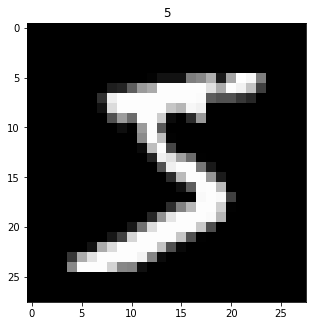

In [45]:
# Desenho da imagem a partir da base de dados
plt.figure(figsize = (5, 7));
plt.imshow(x_train[0], cmap = plt.get_cmap('gray'));
plt.title(y_train[0]);

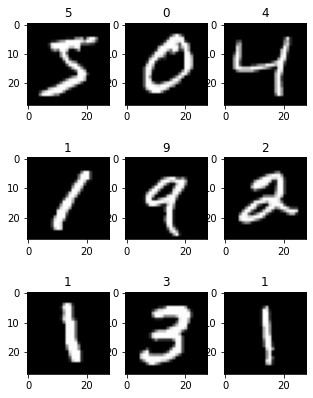

In [46]:
# Loop para as primeiras 9 observações
plt.figure(figsize = (5, 7))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(x_train[i], cmap = plt.get_cmap('gray'))
    plt.title(y_train[i])

## Criação das variáveis dummies para target

In [54]:
# A função np_utils cria variáveis dummies a parte de uma variável categórica
from keras.utils import np_utils

# Criação das variáveis dummy
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Definição da Rede Neural

Treinaremos uma Rede com uma camada oculta de 4 neurônios.

Como temos um modelo multi-categórico (_target_ é categórico variando de 0 a 9), utilizaremos a função de ativação `sigmoid` e a função de perda `categorial cross entropy` para a camada de _output_.

In [82]:
model = keras.Sequential()

# Camada Input
model.add(
    layers.Flatten(input_shape = x_train.shape[1:])
    )

# Camada Oculta
model.add(layers.Dense(4, # neurônios na camada oculta
                       activation = 'relu', # função de ativação relu
                       kernel_regularizer = keras.regularizers.l1_l2() # adicionar regularização l1 e l2
                       )
)

model.add(layers.Dropout(0.10)) # adicionar dropout

# Camada Output
model.add(layers.Dense(10, # neurônios na camada de output
                       activation = 'sigmoid' # função de ativação sigmoid
                       )
)

model.compile(loss = 'categorical_crossentropy', # função de perda
              optimizer = keras.optimizers.Adam(), # algoritmo de otimização
              metrics = [keras.metrics.CategoricalAccuracy()] # métricas de acerto
             )

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 4)                 3140      
                                                                 
 dropout_2 (Dropout)         (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


Ao definir a estrutura da rede, é possível observar o número de parâmetros da rede. Mesmo em uma rede relativamente simples, o número de parâmetros a ser treinados pode ser muito grande, trazendo a necessidade de _big data_ e o conceito de _deep learning_.

In [83]:
# Avaliação do Modelo RNA MLP antes do treinamento
score = model.evaluate(x_test, y_test, verbose = 0)
accuracy = 100 * score[1]
print('Acurácia no conjunto de Teste: %.2f%%' % accuracy)

Acurácia no conjunto de Teste: 7.86%


Antes de realizar o treinamento dos pesos sinápticos, é possível obter uma acurácia de 8,32% com o modelo.

Comparativamente, esse valor é menor do que a escolha pelo acaso (1/10 = 10%).

# Treinamento da RNA

In [84]:
# definição de variável para que o modelo pare o treinamento
# o parâmetro patience define quantas tentativas sem melhora da métrica de erro o modelo aceita antes de parar
callback = keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                         patience = 10
                                        )
# o modelo é treinado pela função fit e seu resultado é armazenado na variável historico
historico = model.fit(x = x_train, 
                      y = y_train,
                      epochs = 50, # quantidade máxima de loops
                      batch_size = 256,
                      validation_split = 0.1,
                      verbose = 1, # processo de treinamento é exibido
                      callbacks = callback)

Epoch 1/50
211/211 [==============================] - 5s 15ms/step - loss: 3.5656 - categorical_accuracy: 0.1122 - val_loss: 3.0102 - val_categorical_accuracy: 0.1052
Epoch 2/50
211/211 [==============================] - 3s 15ms/step - loss: 2.9111 - categorical_accuracy: 0.1132 - val_loss: 2.8258 - val_categorical_accuracy: 0.1052
Epoch 3/50
211/211 [==============================] - 3s 14ms/step - loss: 2.7636 - categorical_accuracy: 0.1132 - val_loss: 2.7100 - val_categorical_accuracy: 0.1050
Epoch 4/50
211/211 [==============================] - 4s 20ms/step - loss: 2.6284 - categorical_accuracy: 0.1365 - val_loss: 2.4527 - val_categorical_accuracy: 0.2025
Epoch 5/50
211/211 [==============================] - 3s 14ms/step - loss: 2.3991 - categorical_accuracy: 0.1954 - val_loss: 2.2202 - val_categorical_accuracy: 0.2695
Epoch 6/50
211/211 [==============================] - 3s 14ms/step - loss: 2.1925 - categorical_accuracy: 0.2682 - val_loss: 2.0196 - val_categorical_accuracy: 0.318

In [85]:
score_train, metric_train = model.evaluate(x_train, y_train, verbose = 0)
score_test, metric_test = model.evaluate(x_test, y_test, verbose = 0)

print('Desempenho no conjunto de Treino: {:.2%}'.format(metric_train))
print('Desempenho no conjunto de Teste: {:.2%}'.format(metric_test))

Desempenho no conjunto de Treino: 81.44%
Desempenho no conjunto de Teste: 81.24%


Após o treino, é possível ver uma mudança substancial no desempenho do modelo.

<br>

Contudo, também é possível observar como foi o processo de treinamento dos parâmetros da rede ao longo das épocas.

In [87]:
# dentro da variável historico criada, temos o dicionário history
historico.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

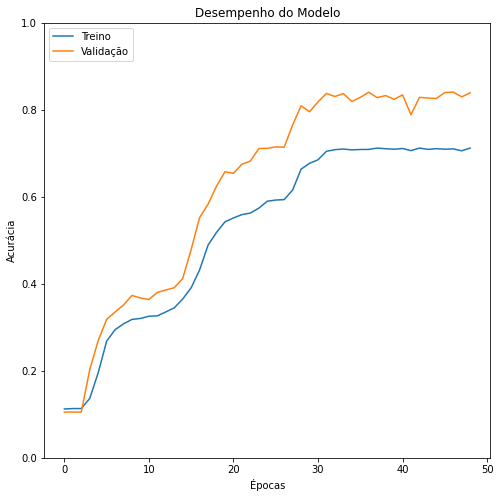

In [86]:
# Gráfico com a evolução do treinamento
fig, ax = plt.subplots(figsize = (8, 8)) # definir tamanho da imagem
ax.set_ylim([0, 1]) # eixo y variando entre 0 e 1

plt.plot(historico.history['categorical_accuracy']) # métrica de acerto durante o treino
plt.plot(historico.history['val_categorical_accuracy']) # métrica de acerto durante o teste

plt.legend(['Treino', 'Teste'], loc='upper left') # adicionar legenda

plt.title('Desempenho do Modelo') # título
plt.xlabel('Épocas') # label do eixo x
plt.ylabel('Acurácia') # label do eixo y

plt.show()

Ao observar o desempenho do modelo ao longo do processo de treinamento, é possível observar que

1.  A acurácia de treino foi inferior a acurácia de teste, o que pode indicar _underfitting_
2. A distância entre a curva de treino e teste não é pequena, sendo um possível indicador de que o parâmetro de `patience` pode ser alterado